<a href="https://colab.research.google.com/github/ddonggsa/project/blob/master/%E1%84%87%E1%85%AE%E1%84%89%E1%85%B3%E1%84%90%E1%85%B3%E1%84%8F%E1%85%A9%E1%84%89%E1%85%B3_1_3_%E1%84%8C%E1%85%A9%E1%86%BC%E1%84%92%E1%85%A1%E1%86%B8%E1%84%87%E1%85%A7%E1%86%BC%E1%84%8B%E1%85%AF%E1%86%AB%E1%84%87%E1%85%AE%E1%86%AB%E1%84%91%E1%85%A9_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 과제를 위해 다음 셀을 실행합니다.

```python
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape
```

In [17]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,052 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129504 files and di

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [2]:
# df = pd.read_csv("boostcourse-ds-510/data/상가(상권)정보_의료기관_201909.csv", low_memory=False)
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", 
                 low_memory=False)
df.shape

(91335, 39)

In [3]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [4]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [79]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [28]:
## 나중에 가설검증 할 떄 쓰일 전국에 있는 병원의 빈도수 구하기
df_hospital = df[df['상권업종중분류명'] == '병원']
df_hospital.value_counts()

Series([], dtype: int64)

In [30]:
## 전국 시도별 병원수 구하기
df_hospital_region = df_hospital['시도명'].value_counts()
df_hospital_region

경기도        14101
서울특별시      13406
부산광역시       4601
경상남도        3218
인천광역시       3159
대구광역시       3119
경상북도        2603
전라북도        2497
충청남도        2165
광주광역시       2152
대전광역시       2039
전라남도        1992
충청북도        1659
강원도         1576
울산광역시       1297
제주특별자치도      721
세종특별자치시      219
Name: 시도명, dtype: int64

## TODO1 전국 시도별 약국수를 구해주세요!

* 상권업종중분류명이 병원인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
* 다음의 결과가 나오도록 구합니다.
```
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
```

In [5]:
df_hospital = df['상권업종중분류명'] == '병원'
df_hospital.value_counts()

True     60774
False    30561
Name: 상권업종중분류명, dtype: int64

In [6]:
df_drug = df[df['상권업종소분류명'] == '약국']
df_region = df_drug['시도명'].value_counts()
df_region

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

## TODO 2

* 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다.
* 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?
* 빈도수를 구하고 시각화 하여 동물병원이 어느지역에 많은지 분석해 주세요!

* 다음의 결과가 나오도록 구합니다.

```
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64
```

In [20]:
df_animal = df[(df['상권업종소분류명'] == '동물병원') ].copy()
df_animal_region = df_animal['시도명'].value_counts()
df_animal_region

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

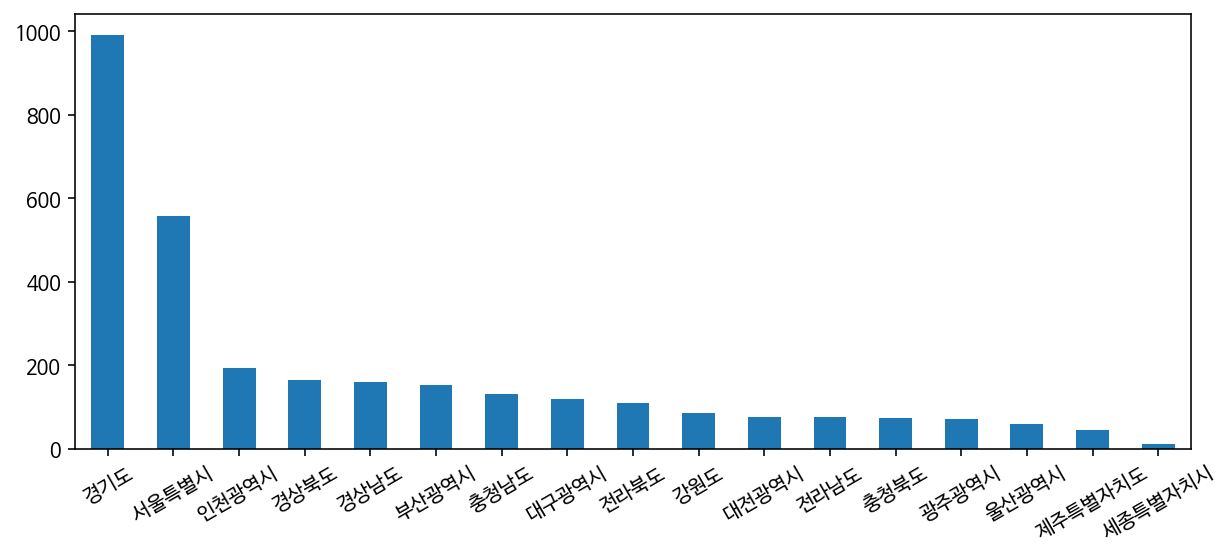

In [21]:
df_animal["시도명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

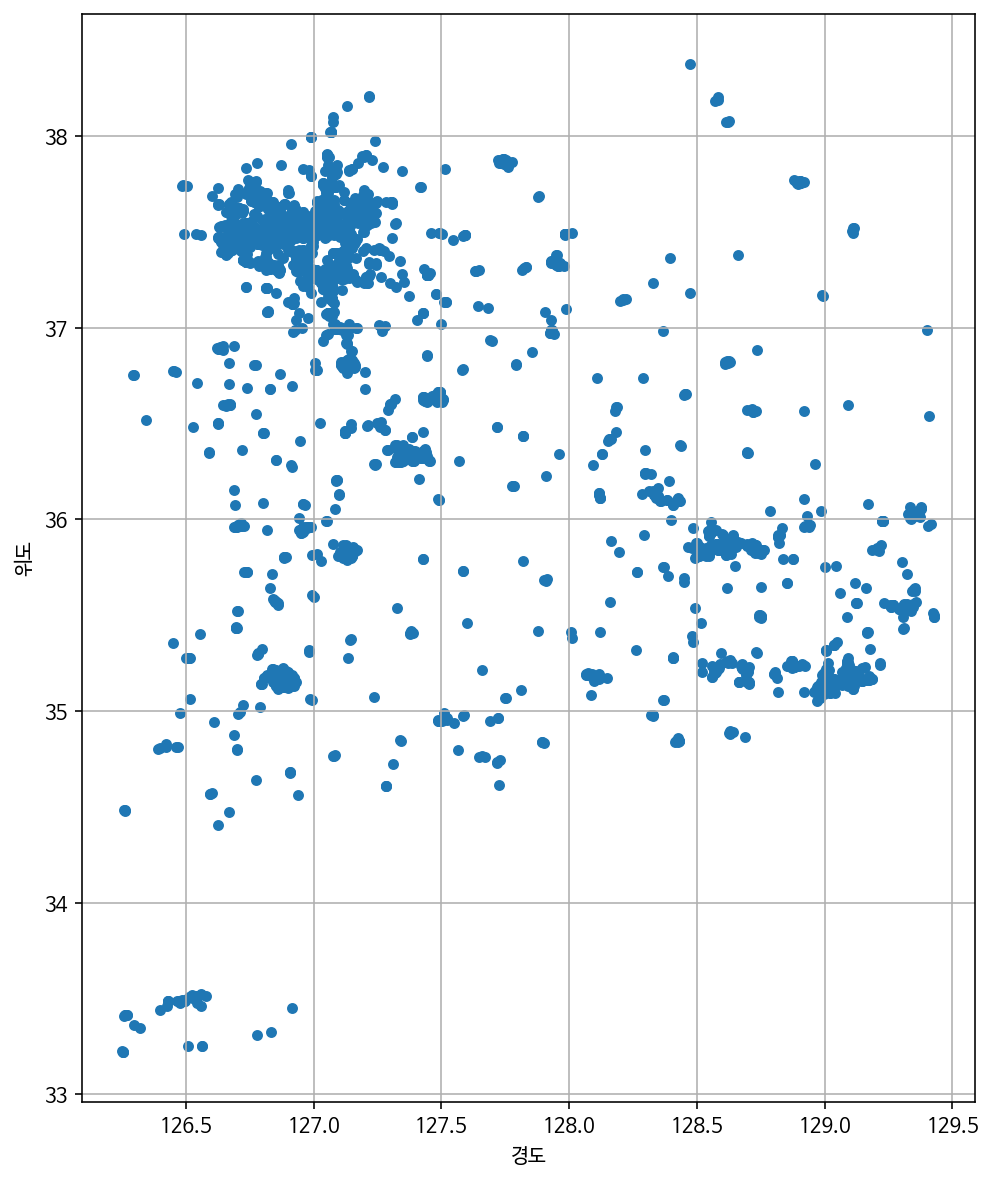

In [24]:
df_animal[["경도", "위도", "시도명"]].plot.scatter(x="경도", y="위도", figsize=(8, 10), grid=True) ## matplotlib으로 그려본 전국 동물병원 지도

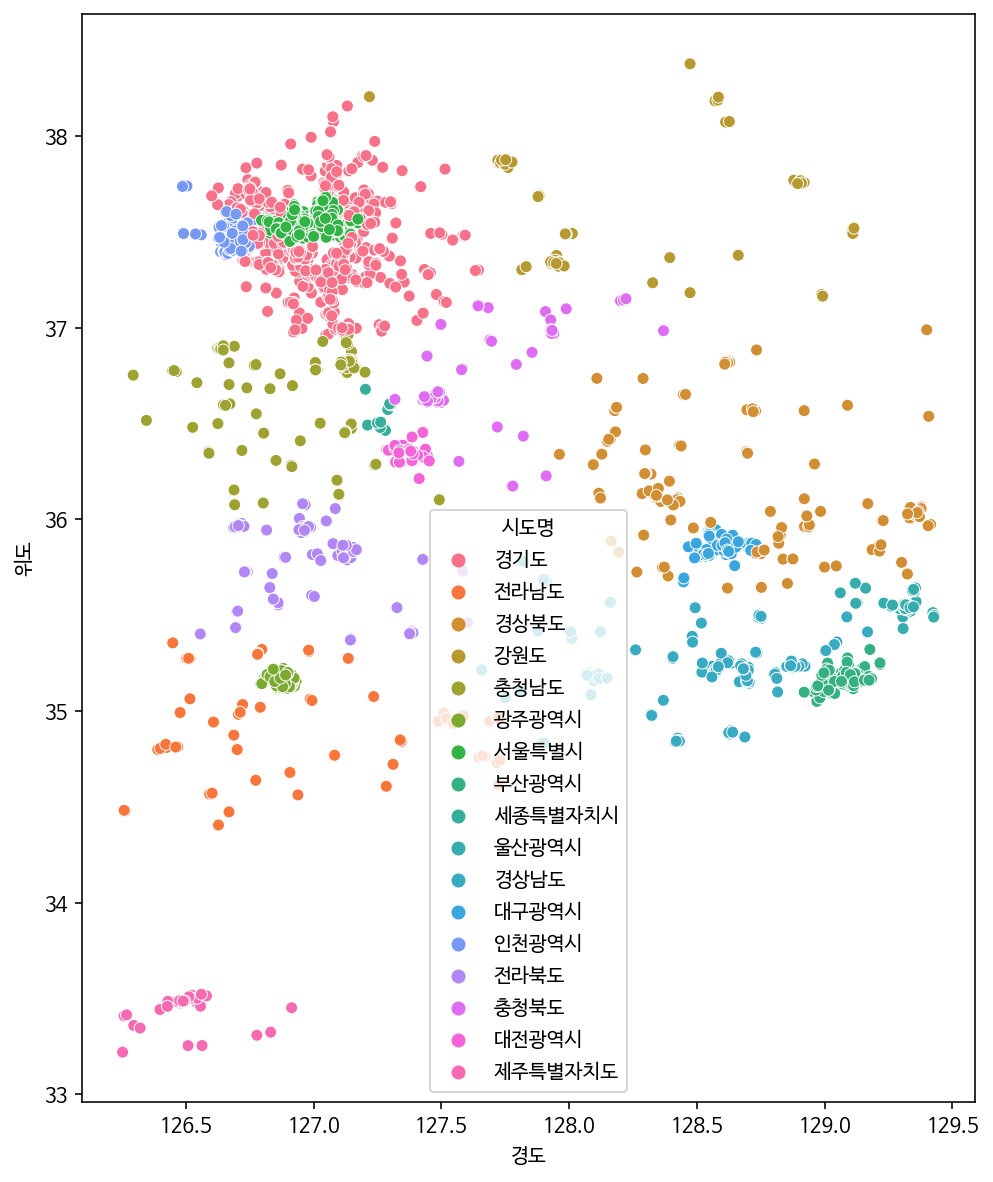

In [26]:
plt.figure(figsize=(8, 10))
sns.scatterplot(data=df_animal, x="경도", y="위도", hue="시도명") ## seaborn 을 이용하여 그려본 동물병원 전국 지도 , hue 를 이용하여 지역별로 색을 다르게 설정

**위 결과로 인하여 동물병원은 경기도와 서울지역에 가장 많고, 세종특별자치시에 가장 적은것으로 나타납니다**.

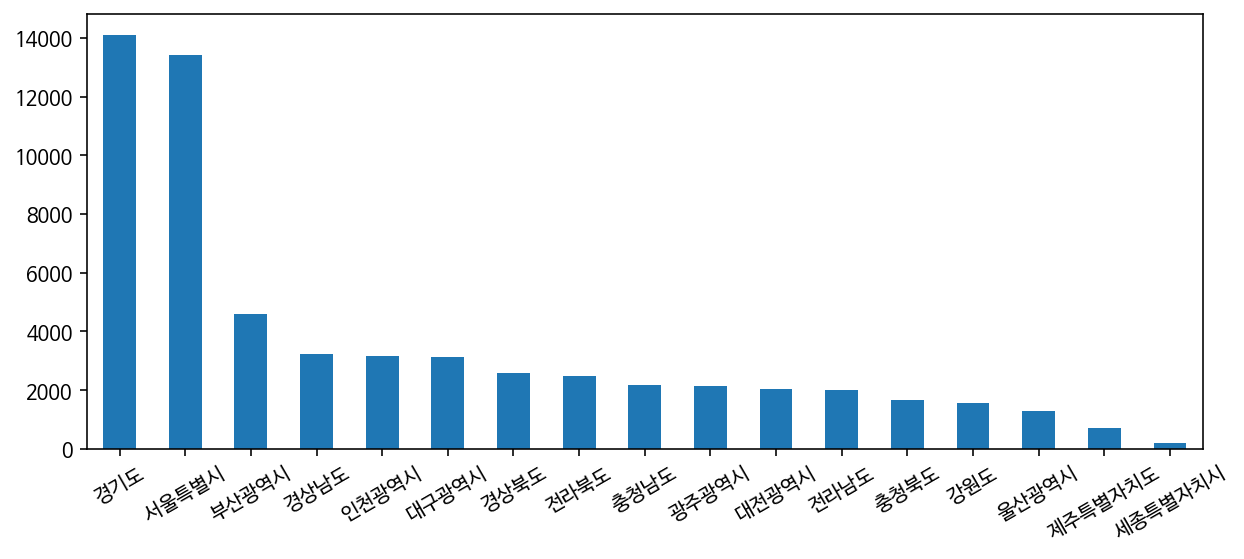

In [31]:
# 위에서 구해놓은 약국과 병원의 전국 개수를 위와 같은 시각화를 통해서 어떤 지역에 가장 많은지, 그리고 동물병원도 병원과 약국이 많은 곳에 위치하고 있는지 가설을 검증해본다. 
df_hospital["시도명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

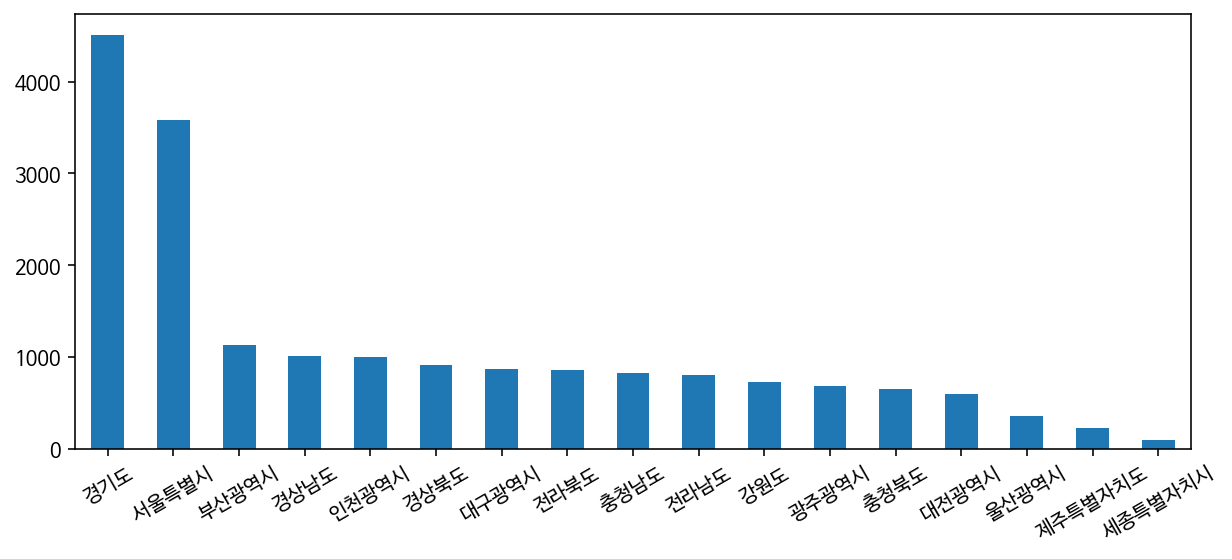

In [33]:
df_drug["시도명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

**위 결과로 병원이 가장 많은 곳은 경기도와 서울특별시, 제일 적은 곳은 세종특별자치시, 약국도 이와 같은 결과를 보여줬으므로, 병원과 약국이 많이 위치해있는 곳에 동물병원도 위치해 있다고 가설을 검증할 수 있다.** 

## TODO 3
* 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른지역에 비해 전체 병원 수 중에서 어느정도의 비율을 차지하고 있는지 구별로 구해주세요. 상권업종소분류명에 "피부" 나 "성형"이 들어가는 서울시에 소재한 병원을 찾아주세요. 그리고 시군구별로 피부, 성형이 들어가는 비율이 어느정도 되는지 구해주세요. 다음과 같이 결과가 나오도록 합니다. 


* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* `피부과 성형외과 수 / 전체병원 수` 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다. 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!


```
시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
```

In [80]:
df_seoul = df_hospital.loc[df_hospital["시도명"] == "서울특별시"].copy()
df_seoul_beauty = df_seoul.loc[df_seoul['상권업종소분류명'].str.contains('피부|성형')]
a = df_seoul_beauty['시군구명'].value_counts() 
b = df_seoul['시군구명'].value_counts()
ratio = a/b
ratio_sort = ratio.sort_values(ascending=False)
print(ratio_sort.round(2))

강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64


## TODO 4
* 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러 분은 실버 의료 산업과 관련된 스타트업에 취업했습니다.
* 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다. folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.

* folium 문서 : https://python-visualization.github.io/folium/quickstart.html
<img src="https://i.imgur.com/quiHI4u.png">

In [82]:
import folium

In [81]:
df_silver = df[df['상권업종소분류명'] == '노인/치매병원']
df_silver

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91184,16311246,유성재단유성요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4833010400104910005003855,외한은행,경상남도 양산시 삼일로 75,626800.0,50619.0,NaN,NaN,NaN,129.035645,35.343927
91216,16122998,실로암요양병원매점,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4514012200102240004078939,실로암사랑병원,전라북도 익산시 선화로 389,570979.0,54629.0,NaN,NaN,NaN,126.973450,35.946242
91253,16108794,한사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2917011500109670002002194,NaN,광주광역시 북구 서하로 244,500838.0,61130.0,NaN,NaN,NaN,126.907230,35.186972
91328,16198812,서울플러스,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4420025328105080000002698,배방자이1차아파트,충청남도 아산시 배방읍 호서로 460,336729.0,31495.0,NaN,2,NaN,127.083401,36.768332


In [89]:
map = folium.Map(location=[df_silver["위도"].mean(),df_silver["경도"].mean()], zoom_start=1)

In [90]:
for n in df_silver.index:
    name = df_silver.loc[n, "상호명"]
    address = df_silver.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_silver.loc[n, "위도"], df_silver.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map